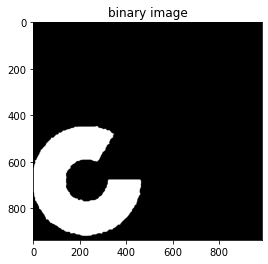

1
1


In [1]:
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt

img16 = cv.imread("../Images/img16.png")
img16gray = cv.cvtColor(img16, cv.COLOR_BGR2GRAY)
#故意调整下限阈值，只留下一个轮廓
ret, thresh = cv.threshold(img16gray, 100, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.imshow(thresh,'gray'),plt.title("binary image")
plt.show()
print(len(contours))
print(len(hierarchy))

In [2]:
#特证矩
cnt = contours[0]
M = cv.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx)
print(cy)

{'m00': 122135.5, 'm10': 24705077.0, 'm01': 85125144.33333333, 'm20': 6661508692.083333, 'm11': 17543530830.708332, 'm02': 61373875668.416664, 'm30': 2075045953377.2002, 'm21': 4802696597337.517, 'm12': 12882481981183.15, 'm03': 45552622936499.805, 'mu20': 1664265224.1650858, 'mu11': 324759503.85321045, 'mu02': 2043949498.1317596, 'mu30': 54301074149.379395, 'mu21': 28422893216.28247, 'mu12': 15324410657.687134, 'mu03': -72465728524.23438, 'nu20': 0.11156775883569714, 'nu11': 0.02177098306171274, 'nu02': 0.13702074727560862, 'nu30': 0.010416063862095799, 'nu21': 0.0054520960316898496, 'nu12': 0.0029395374319915726, 'nu03': -0.013900418508210102}
202
696


In [3]:
# 轮廓面积
area = cv.contourArea(cnt) 
print(area)

122135.5


In [4]:
#轮廓周长
perimeter = cv.arcLength(cnt,True)
print(perimeter)

2166.250991821289


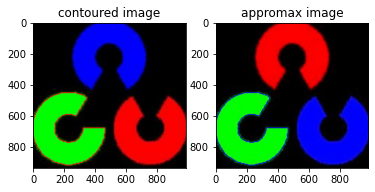

In [5]:
#轮廓近似
epsilon = 0.1*cv.arcLength(cnt,True) 
approx = cv.approxPolyDP(cnt,epsilon,True)

con_img16 =  cv.drawContours(img16, contours, -1, (0, 0, 255), 3)
con_approx_img16 =  cv.drawContours(img16, approx, -1, (0, 0, 255), 3)
con_img16 = con_img16[:,:,:: -1]

plt.subplot(121),plt.imshow(con_img16),plt.title("contoured image")
plt.subplot(122),plt.imshow(con_approx_img16),plt.title("appromax image")
plt.show()
#由于轮廓比较规整，所以近似后区别不大

In [6]:
#轮廓凸包未测试
#检查凸度
value = cv.isContourConvex(cnt)
print(value)

False


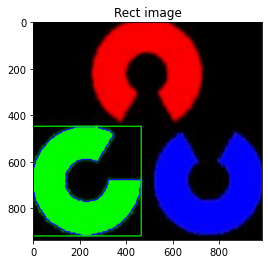

In [7]:
#边界矩形
#7.a直角矩形
x,y,w,h = cv.boundingRect(cnt)
img_rect = cv.rectangle(img16,(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(img_rect),plt.title("Rect image")
plt.show()

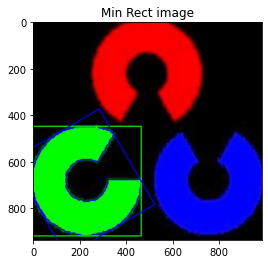

In [8]:
#7.b 旋转矩形（最小面积）
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
img_min_rect = cv.drawContours(img16,[box],0,(0,0,255),3)
plt.imshow(img_min_rect),plt.title("Min Rect image")
plt.show()

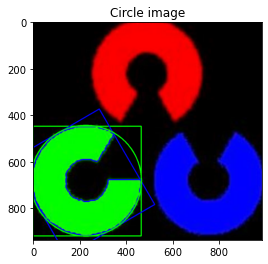

In [9]:
#最小闭合圆
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img_circle = cv.circle(img16,center,radius,(0,255,0),3)
plt.imshow(img_circle),plt.title("Circle image")
plt.show()

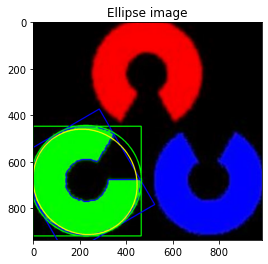

In [10]:
#拟合椭圆
ellipse = cv.fitEllipse(cnt)
img_ellipse = cv.ellipse(img16,ellipse,(255,255,0),3)
plt.imshow(img_ellipse),plt.title("Ellipse image")
plt.show()

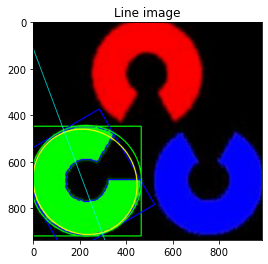

In [11]:
#拟合直线
rows,cols = img16.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img_line = cv.line(img16,(cols-1,righty),(0,lefty),(0,255,255),2)
plt.imshow(img_line),plt.title("Line image")
plt.show()